# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [16]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(14, 6))

In [25]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
22086,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
22087,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
22088,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
22089,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


<AxesSubplot:>

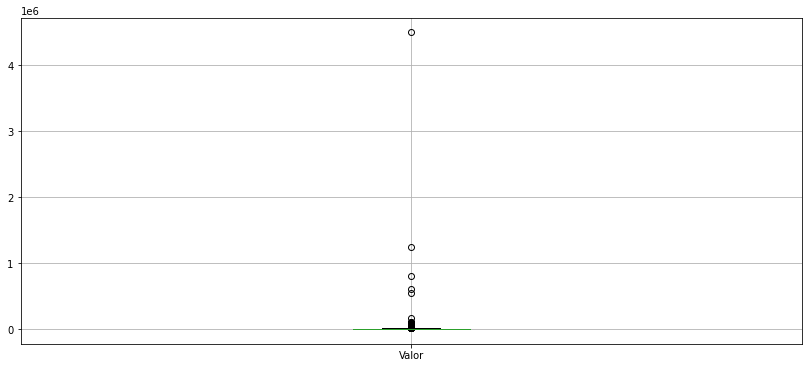

In [18]:
dados.boxplot(['Valor'])

In [19]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7731,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10774,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12822,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
14023,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15715,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [20]:
valor = dados['Valor']

In [21]:
Q1 = valor.quantile(.25)
Q2 = valor.quantile(.50)
Q3 = valor.quantile(.75)

IIQ = Q3 - Q1
l_inf = Q1 - 1.5 * IIQ
l_sup = Q3 + 1.5 * IIQ

print(f'Q1 = {Q1}\nQ2 = {Q2}\nQ3 = {Q3}\n')
print(f'IIQ = {IIQ}\nLimite Inf: {l_inf}\nLimite Sup: {l_sup}')

Q1 = 1600.0
Q2 = 2750.0
Q3 = 5500.0

IIQ = 3900.0
Limite Inf: -4250.0
Limite Sup: 11350.0


In [26]:
selecao = (valor >= l_inf) & (valor <= l_sup)

In [27]:
dados_new = dados[selecao]

dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
22086,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
22087,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
22088,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
22089,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


<AxesSubplot:>

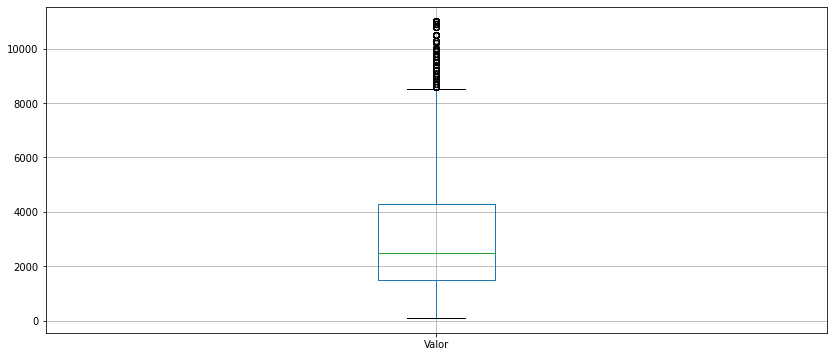

In [28]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

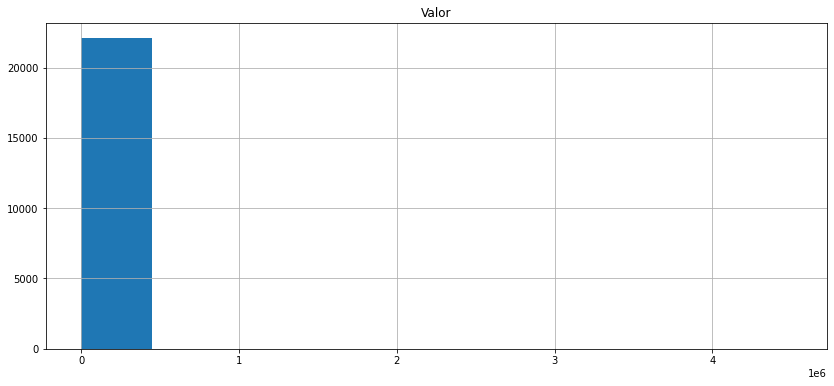

In [29]:
dados.hist(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

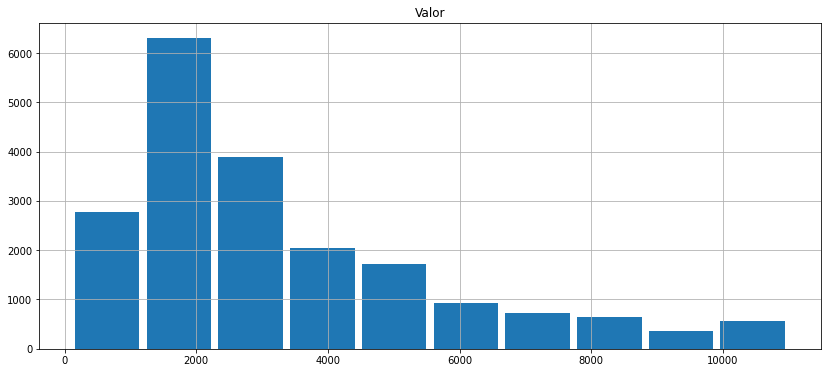

In [37]:
dados_new.hist(['Valor'], rwidth=.90)

## (Continuação)

<AxesSubplot:title={'center':'Valor'}, xlabel='Tipo'>

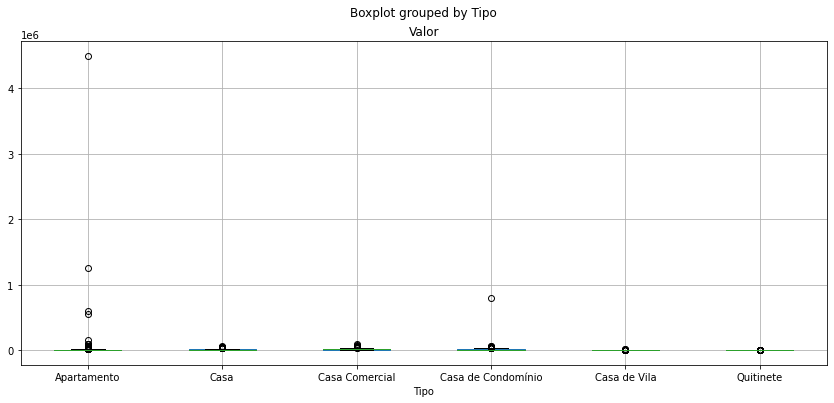

In [38]:
dados.boxplot(['Valor'], by='Tipo')

In [40]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [41]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 80, 81, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, ...], 'Casa': [1, 22, 54, 57, 97, 101, 146, 162, 182, 241, 253, 256, 267, 289, 313, 319, 338, 343, 361, 382, 389, 403, 428, 438, 479, 480, 486, 517, 548, 549, 574, 579, 580, 626, 630, 639, 644, 645, 670, 686, 710, 731, 734, 771, 782, 792, 869, 886, 953, 999, 1046, 1053, 1136, 1141, 1143, 1175, 1196, 1268, 1275, 1336, 1355, 1370, 1391, 1434, 1448, 1452, 1463, 1468, 1495, 1498, 1511, 1611, 1629, 1681, 1687, 1691, 1696, 1709, 1734, 1742, 1787, 1836, 1861, 1901, 1931, 1959, 1968, 1987, 2046, 2066, 2083, 2102, 2128, 2134, 2135, 2160, 2198, 2229, 2232, 2239, ...], 'Casa

In [42]:
Q1 = grupo_tipo.quantile(.25)
Q2 = grupo_tipo.quantile(.50)
Q3 = grupo_tipo.quantile(.75)

IIQ = Q3 - Q1
l_inf = Q1 - 1.5 * IIQ
l_sup = Q3 + 1.5 * IIQ

print(f'Q1 = {Q1}\nQ2 = {Q2}\nQ3 = {Q3}\n')
print(f'IIQ = {IIQ}\nLimite Inf: {l_inf}\nLimite Sup: {l_sup}')

Q1 = Tipo
Apartamento           1700.0
Casa                  1100.0
Casa Comercial        6000.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64
Q2 = Tipo
Apartamento            2800.0
Casa                   2200.0
Casa Comercial        12000.0
Casa de Condomínio     8500.0
Casa de Vila           1100.0
Quitinete              1150.0
Name: Valor, dtype: float64
Q3 = Tipo
Apartamento            5000.0
Casa                   9800.0
Casa Comercial        18000.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

IIQ = Tipo
Apartamento            3300.0
Casa                   8700.0
Casa Comercial        12000.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64
Limite Inf: Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa Comercial       -12000.0
Casa de Condomínio   -128

In [43]:
l_inf['Apartamento']

-3250.0

In [44]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= l_inf[tipo]) & (dados['Valor'] <= l_sup[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='Tipo'>

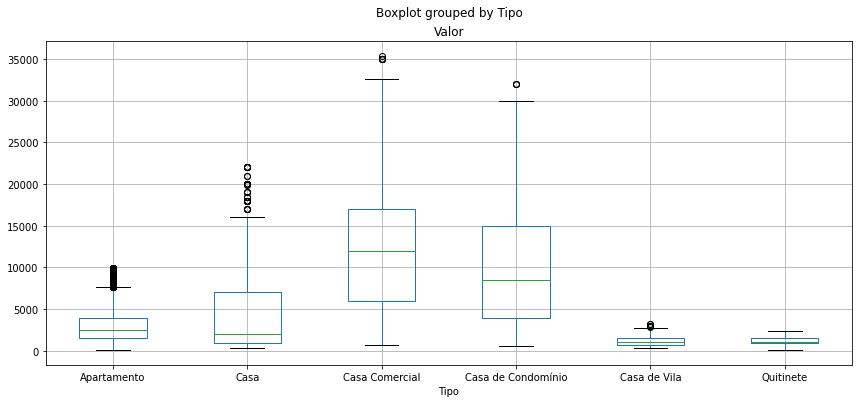

In [50]:
dados_new.boxplot(['Valor'], by='Tipo')